# Regularized Method for Regression

Some examples:

* [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Least Absolute Shrinkage and Selection Operator (LASSO)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Ridge Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)


***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.24.3
2.0.3
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
1.2.2


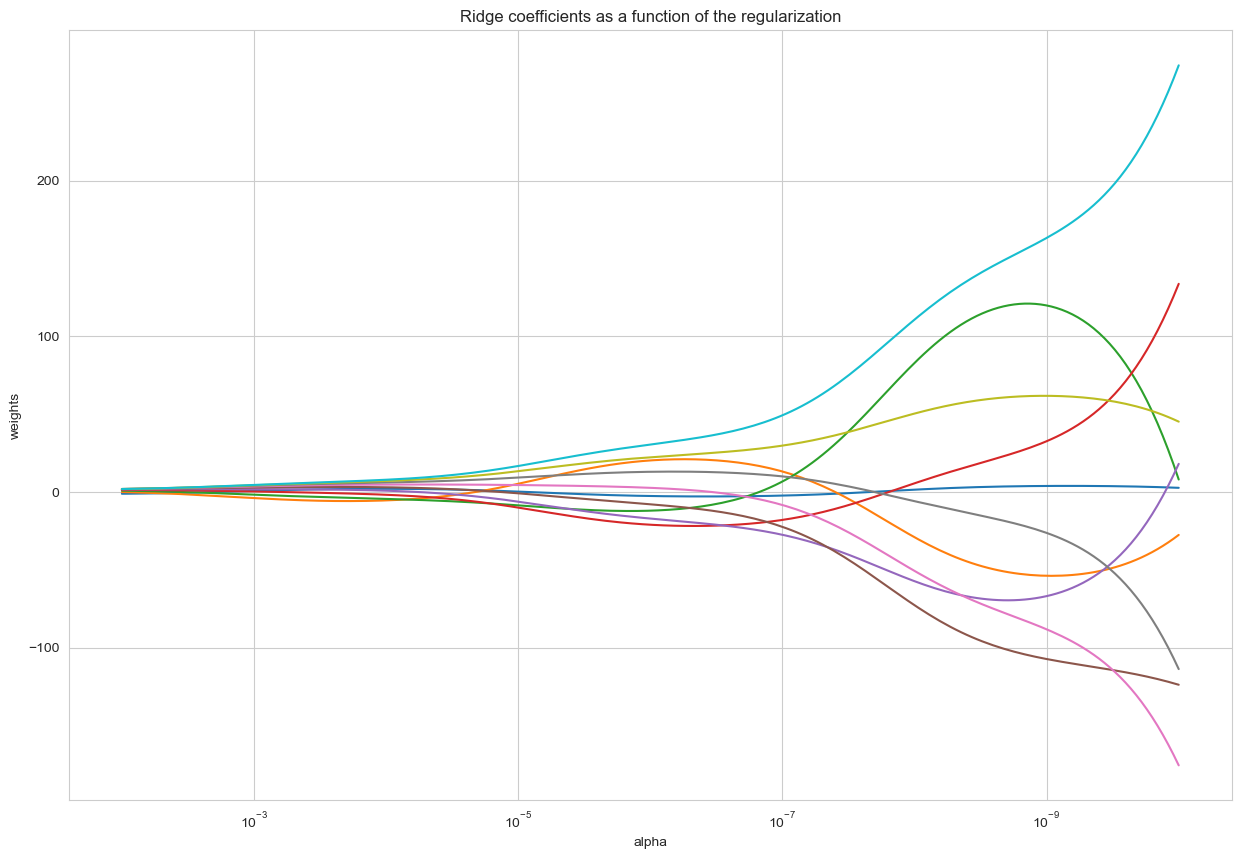

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# ###########################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# ###########################################################################
# Display results

plt.figure(figsize=(15,10))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## LASSO Regression

A linear model that estimates sparse coefficients.


## Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.


***

# Outliers Impact 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


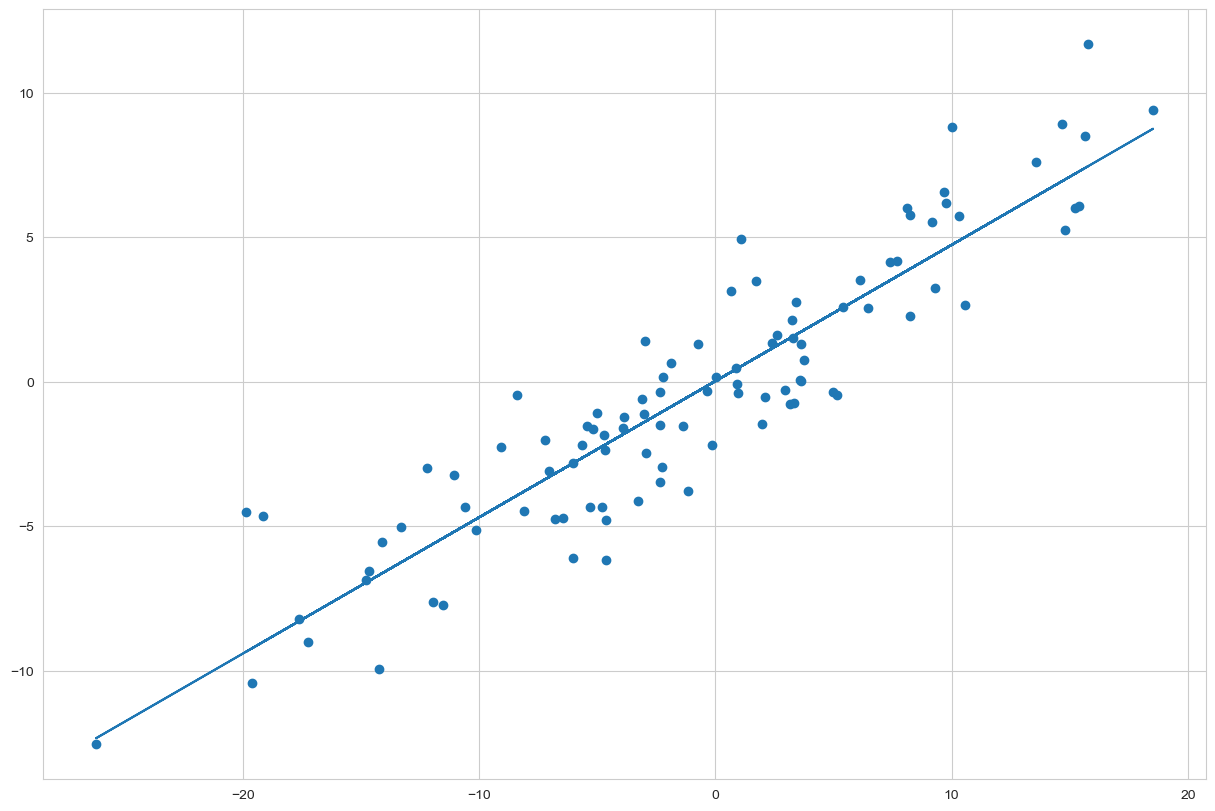

In [6]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(15,10));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_)

In [7]:
idx = rng.argmax()
y_gen[idx] = 200
idx = rng.argmin()
y_gen[idx] = -200

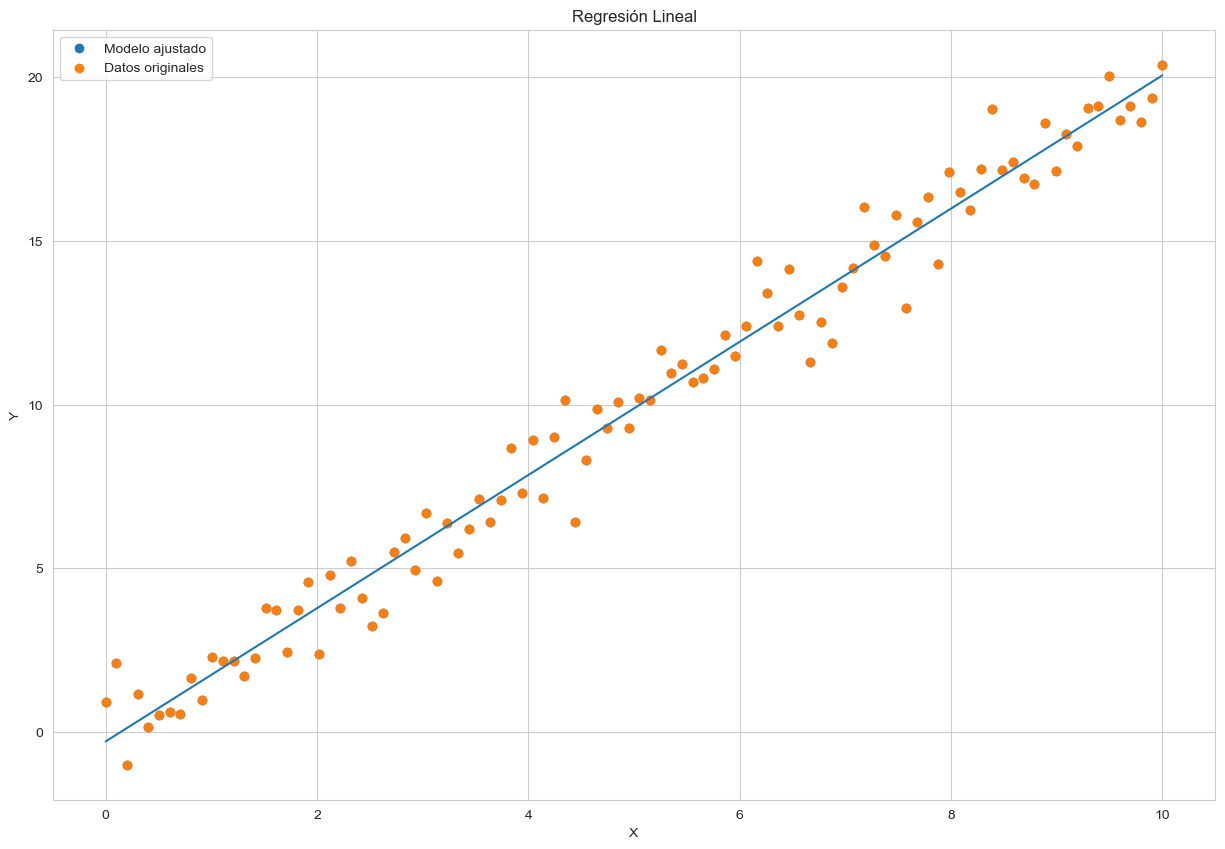

Coefficient Estimate:  [5.93015991]


In [14]:
# Generar datos de ejemplo
rng = np.linspace(0, 10, 100)
y_gen = 2 * rng + np.random.randn(100)  # Modelo lineal con ruido

# Normalizar las características
scaler = StandardScaler()
rng_normalized = scaler.fit_transform(rng.reshape(-1, 1))

# Crear la figura y el gráfico de dispersión
plt.figure(figsize=(15,10))
plt.scatter(rng, y_gen)

# Ajustar el modelo de regresión lineal
o_lr = LinearRegression()
o_lr.fit(rng_normalized, y_gen)
o_model_pred = o_lr.predict(rng_normalized)

# Graficar el modelo ajustado
plt.scatter(rng, y_gen)
plt.plot(rng, o_model_pred)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal')
plt.legend(['Modelo ajustado', 'Datos originales'])
plt.show()

# Imprimir el coeficiente estimado
print("Coefficient Estimate: ", o_lr.coef_)

## Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [5.90065662]


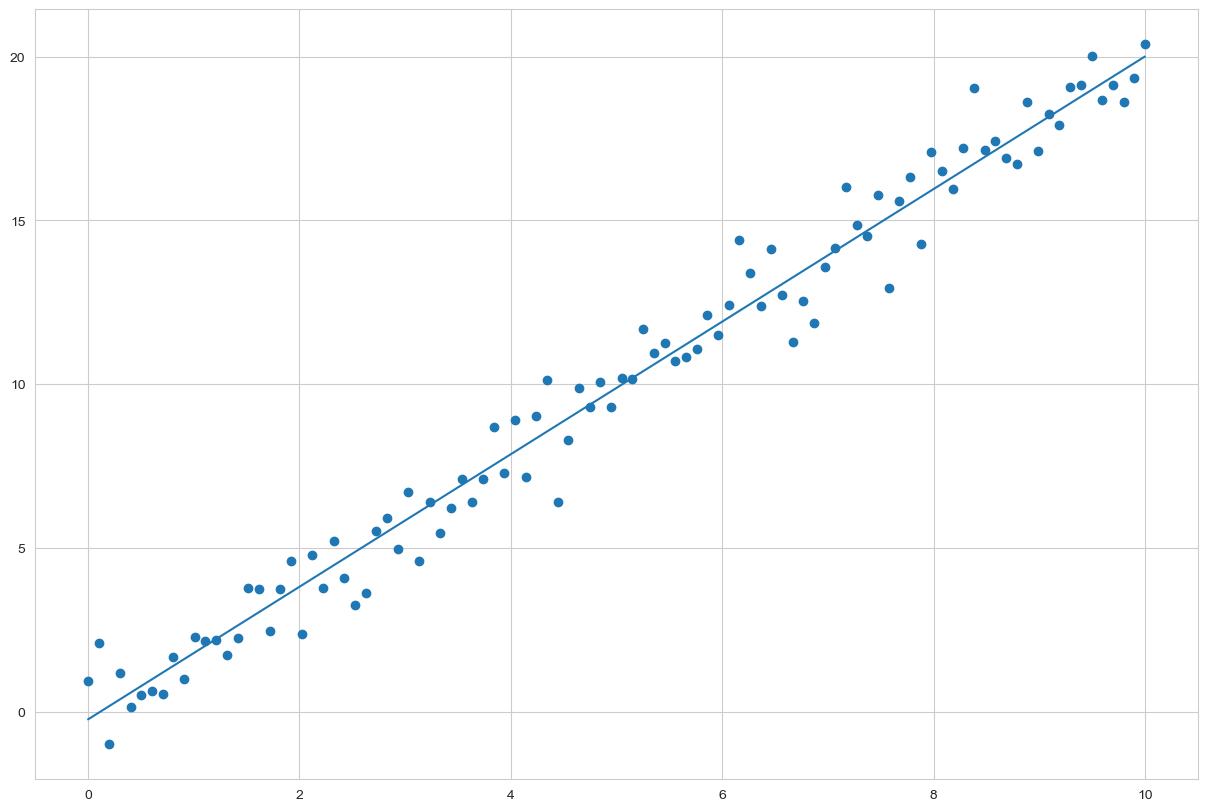

In [18]:
ridge_mod = Ridge(alpha=0.5)
ridge_mod.fit(rng_normalized, y_gen)
ridge_model_pred = ridge_mod.predict(rng_normalized)

plt.figure(figsize=(15,10));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", ridge_mod.coef_)

## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [5.53015991]


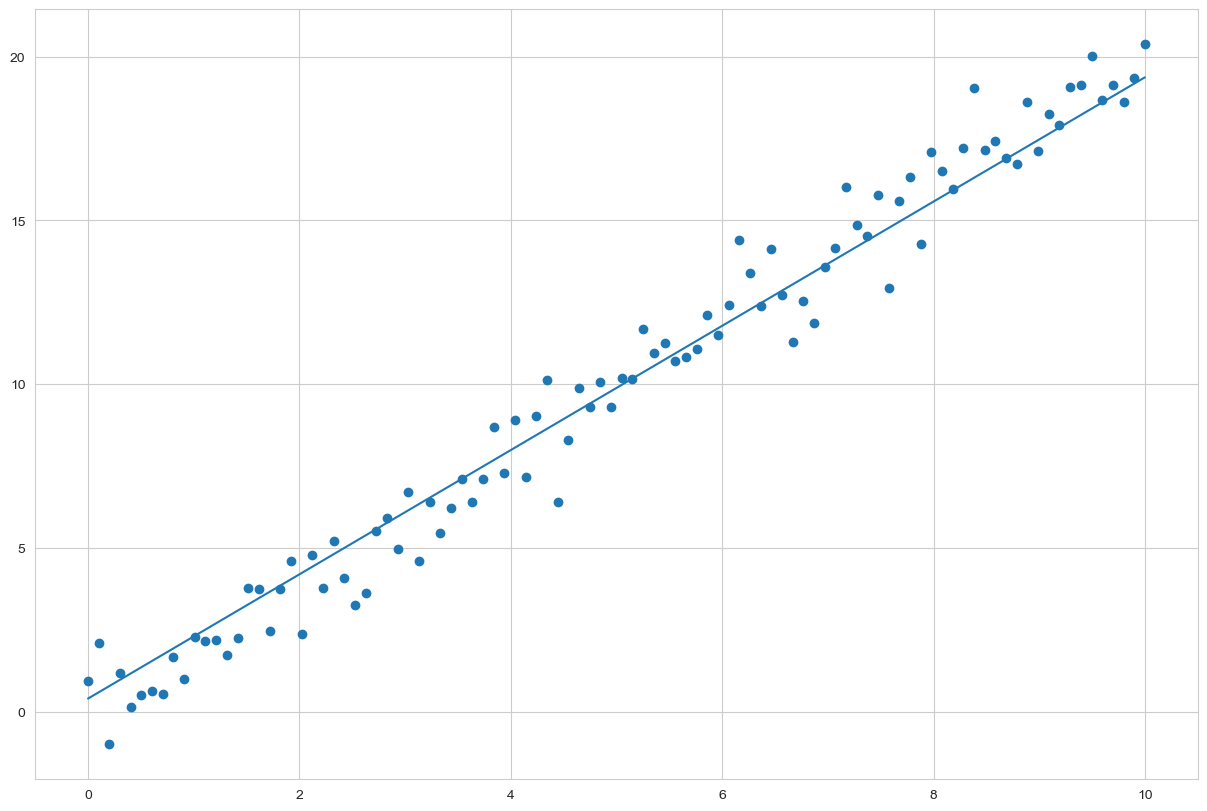

In [21]:
lasso_mod = Lasso(alpha=0.4)
lasso_mod.fit(rng_normalized, y_gen)
lasso_model_pred = lasso_mod.predict(rng_normalized)

plt.figure(figsize=(15,10));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

## Elastic Net Regression

In [22]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [5.86154446]


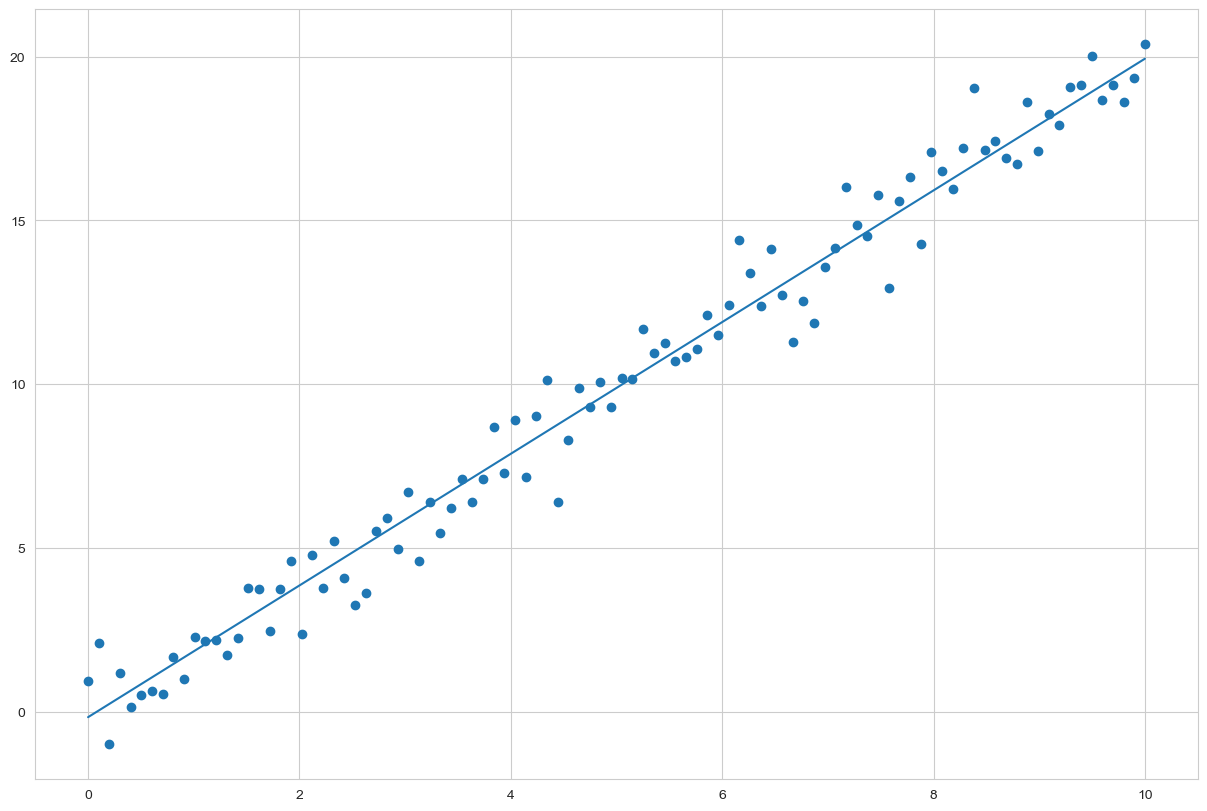

In [24]:
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(rng_normalized, y_gen)
en_model_pred = en_mod.predict(rng_normalized)

plt.figure(figsize=(15,10));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)

***

# Summary

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**When should I use Lasso, Ridge or Elastic Net?**

* **Ridge regression** can't zero out coefficients; You either end up including all the coefficients in the model, or none of them. 

* **LASSO** does both parameter shrinkage and variable selection automatically. 

* If some of your covariates are highly correlated, you may want to look at the **Elastic Net** instead of the LASSO.

# Other References

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)